<a href="https://colab.research.google.com/github/thenoorfatima/PyTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparing and Loading
1. Turn data into numerical format (numerical encoding).
2. Build models to learn patterns/features/weights in those numbers.

In [1]:
## Creating known parameters using linear regression formula (y= mx + c) make a straight line.
import torch
import matplotlib.pyplot as plt

weight = 0.7  # m
bias = 0.3    # c

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X capital since a tensor
y = weight * X + bias                               # Xfeatures ylabels tensors

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [2]:
## Split data into training and test set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]  #everything upto the split
X_test, y_test = X[train_split:], y[train_split:]    #everything onwards the split

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [3]:
## Visualization = plot training and test data

def plt_predict(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test, predictions = None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b',s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g',s=4, label='Testing data')

  if predictions is not None:
      plt.scatter(test_data, predictions, c='r',s=4, label='Predictions')

  plt.legend(prop={'size': 14})

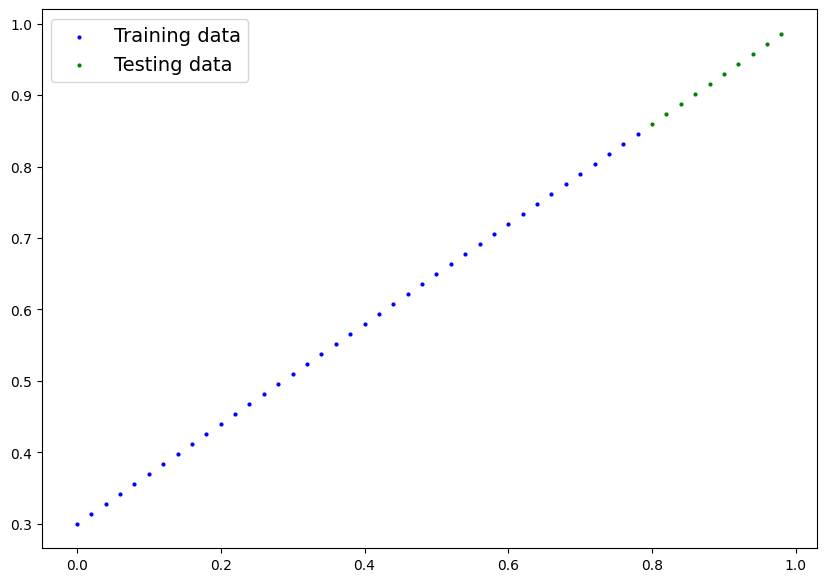

In [4]:
  plt_predict()

nn module:

1. almost everything inherits from it in pytorch
2. contains all pytorch's building blocks for neuralnets/graphs
3. base class for all nn modules
4. our models should also subclass this class

# Creating Linear Regression Model Class
1. Start with random values: weights and bias.
2. Look at training data and adjust random values to get closer to ideal values: Optimization (w & b values used to create the data)
3. Using Gradient Descent and Backpropagation algos.
4. Requires_grad=True means PyTorch will track the gradients of this parameter for use with torch.autograd and gradient descent (for many torch.nn modules, requires_grad=True is set by default)
5. Any subclass of nn Module needs to override "forward()", the forward computation of the model. Forward method defines computation/ operation performed at every call



In [5]:
import torch
from torch import nn

class linreg(nn.Module):                              #subclass nn
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,  # to perform backprop
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype= torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias                 # linear reg. formula
                                                      # x is the input data (training/testing features)

NN Model Building Essentials:

1. torch.nn:	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
2. torch.nn.Parameter:	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
3. torch.nn.Module:	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
4. torch.optim:	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
5. def forward():	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula).
When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

We can check our model params/ whats inside model using .parameters()

In [6]:
torch.manual_seed(42) #used to generate pseudo-random numbers, randomly generated numbers can be determined.

m0 = linreg() # an instance of model / subclass of nn module

list(m0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
m0.state_dict() # Python dictionary object that maps each layer to its parameter tensor.

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
weight, bias

(0.7, 0.3)

* "state_dict": an integral entity in saving or loading models from PyTorch. Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers. Only layers with learnable parameters (convolutional layers, linear layers, etc.) and registered buffers (batchnorm’s running_mean) have entries in the model’s state_dict. Optimizer objects (torch.optim) also have a state_dict, which contains information about the optimizer’s state, as well as the hyperparameters used.

* "torch.inference_mode()": turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.
 used when using a model for inference (making predictions).

In older PyTorch torch.no_grad()





In [9]:
with torch.inference_mode():
  y_pred = m0(X_test)   #pass it the test data X_test to see how closely it predicts y_test.

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

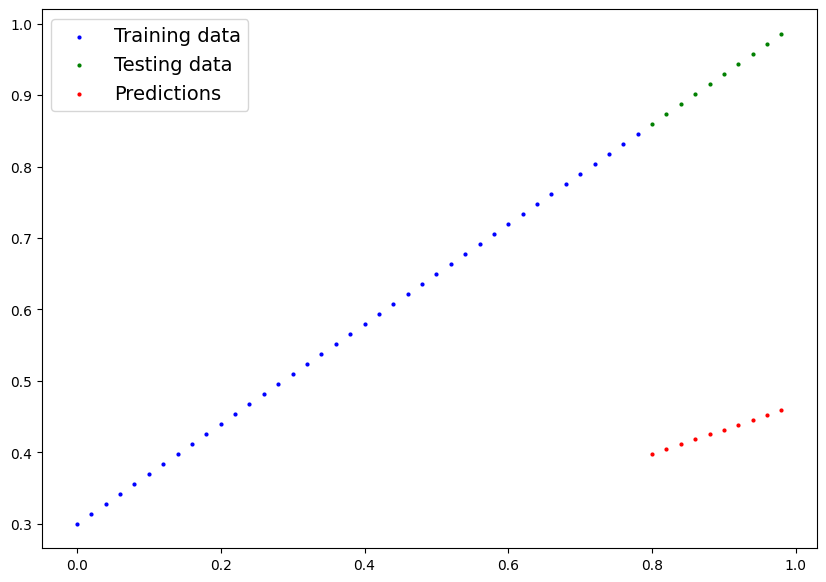

In [10]:
plt_predict(predictions=y_pred)

#MODEL TRAINING NEEDS
#Loss/ Cost/ Criterion function:
Measures how wrong model's predictions (y_preds) are compared to the truth labels (y_test). Lower the better.  Built-in loss functions in torch.nn.

1. Mean absolute error (MAE) for regression problems "torch.nn.L1Loss()" measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

2. Binary cross entropy for binary classification problems "torch.nn.BCELoss()".

#OPTIMIZERS

Tells model how to update its internal parameters to best lower the loss. Optimization function implementations in torch.optim.

1. Stochastic gradient descent "torch.optim.SGD(params, lr)"
2. Adam optimizer "torch.optim.Adam()".

params is the target model parameters to optimize (weights/ bias values we randomly set). Parameter is a value the model itself sets.

lr is the learning rate optimizer updates the parameters at, higher means the optimizer will try larger updates (too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (too small will take too long to find the ideal values).Its a hyperparameter. Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

#Training loop and test loop

In [11]:
# LOSS MAE
lossf = nn.L1Loss()

# OPTIMIZER SGD
optim = torch.optim.SGD(params = m0.parameters(), lr = 0.01)


#Creating an optimization loop in PyTorch
1. The training loop involves the model going through the training data and learning the relationships between the features and labels.

2. The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data.

* "loop": we want our model to loop/look through at each sample in each dataset.

# TRAINING LOOP
0. Pass the data through model for certain epochs and do:
1.	Forward pass/ propagation:	The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)
2.	Calculate loss:	The model's outputs (forward pass predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss(y_pred, y_train)
3.	Zero gradients:	The optimizers gradients are set to zero (accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()
4.	Perform backpropagation on the loss:	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()
5.	Update the optimizer: (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	optimizer.step()


*   Calculate the loss before performing backpropagation on it.
*   Zero gradients before computing the gradients of the loss wrt every model parameter.
*   Step the optimizer after performing backpropagation on the loss.

# TESTING LOOP

1.	Forward pass:	The model goes through all of the testing data once, performing its forward() function calculations.	model(x_test)
2.	Calculate loss:	loss = loss_fn(y_pred, y_test)
3.	Calulate evaluation metrics (optional):	Alongside the loss value calculate other evaluation metrics such as accuracy on the test set.

In [12]:
torch.manual_seed(42)
epochs = 195

# Track different values for model progress (empty loss list)
epoch_count = []
loss_values = []
test_loss_values = []

## TRAINING

for epoch in range(epochs):      # 0. Loop throught data
  m0.train()                     #    set model in tain mode (model dafault state)
                                 #    train mode in pytorch sets all params requiring gradients to require gradients
  y_pred = m0(X_train)           # 1. fwd pass performs the forward() method located within the model object
  loss = lossf(y_pred, y_train)  # 2. Calculate loss value (how wrong are predictions)
  optim.zero_grad()              # 3. Zero the optimizer gradients (accumulate at every epoch, zero to reset at every fwd pass)
  loss.backward()                # 4. Perform backprop on the loss fn (compute gradient of every params having requires_grad =True)
  optim.step()                   # 5. Progress optimizer/ gradient descent. Update model params wrt gradients calculated by (4)
                                 #    we calculate gradient to head opp. to it to get a gradient value =0 and loss =0 [convergence]
## TESTING

  m0.eval()                         #    Turns off dropout/batchnorm/ settings not needed for testing
  with torch.inference_mode():      #    Turns off gradient tracking for inference, etc
    t_pred = m0(X_test)             # 1. Fwd pass
    t_loss = lossf(t_pred, y_test)  # 2. loss

  if epoch % 10 == 0:               # evaluate it every 10 epochs
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(t_loss.detach().numpy())
    print(f'Epoch: {epoch} | MAE Train Loss: {loss}| MAE Test Loss: {t_loss} ')
    print(m0.state_dict())

Epoch: 0 | MAE Train Loss: 0.31288138031959534| MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637| MAE Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134| MAE Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906| MAE Test Loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802| MAE Test Loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876| MAE Test Loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train Loss: 0.03818932920694351| MAE T

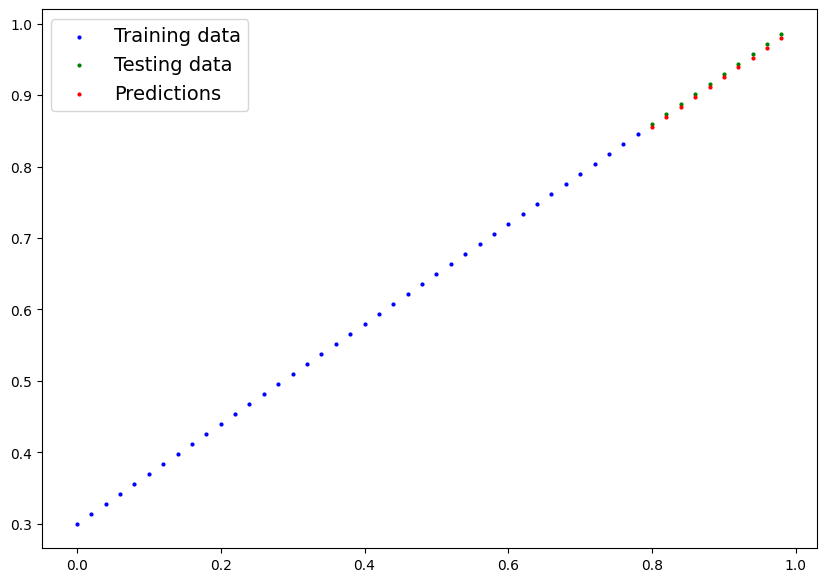

In [13]:
with torch.inference_mode():
  y_pred = m0(X_test)   #pass it the test data X_test to see how closely it predicts y_test.
plt_predict(predictions=y_pred)


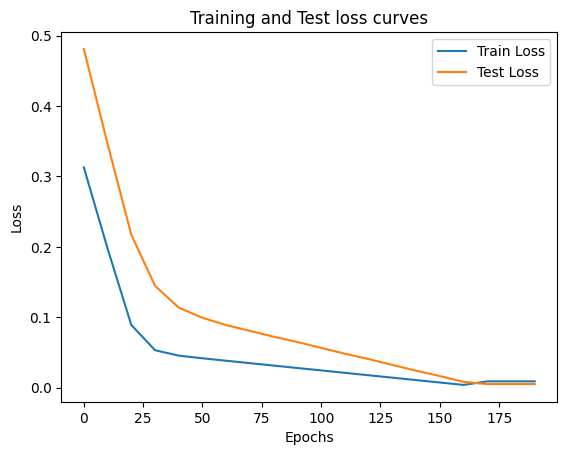

In [14]:
## Plot LOSS Curves
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();



# Saving and loading a PyTorch model
1. torch.save:	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
2. torch.load:	Uses pickle's unpickling features to deserialize and load pickled Python object files ^ into memory. Can also set which device to load the object to (CPU, GPU etc).
3. torch.nn.Module.load_state_dict:	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

* We save the model's state_dict(), dictionary of learned parameters and not the entire model. We first load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (a subclass of nn.Module).

* Disadvantage of saving the whole model: serialized data is bound to the specific classes and the exact directory structure used when the model is saved. Because of this, our code can break in various ways when used in other projects or after refactors.

In [15]:
## SAVING A PYTORCH MODEL
from pathlib import Path

# 1. Create Model Directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model Save Path
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save Model state_dict
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj = m0.state_dict(),
             f = MODEL_SAVE_PATH)


Saving model to models/model_0.pth


In [16]:
!ls -l models/model_0.pth

-rw-r--r-- 1 root root 1496 Sep 13 17:41 models/model_0.pth


In [17]:
## LOADING A PYTORCH MODEL

# Instantiate a new instance of our model (this will be instantiated with random weights)
load0 = linreg()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
load0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<ipython-input-17-da41027e4d01>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [18]:

# 1. Put the loaded model into evaluation mode
load0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loadpred = load0(X_test)

loadpred

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [19]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred == loadpred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])